In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [5]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [7]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [9]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

#Check if the data types are right 
df_uk_full.dtypes

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_9912\3670151657.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

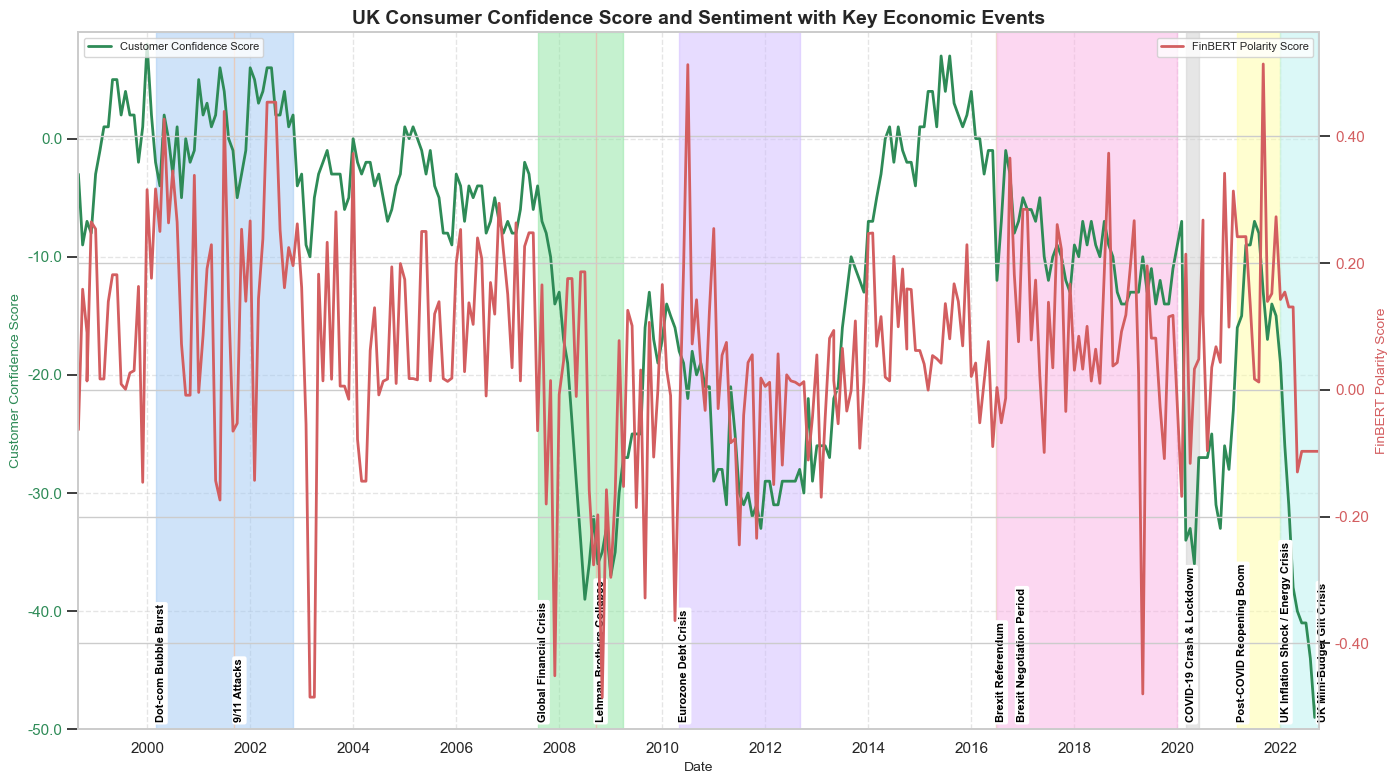

In [93]:
# Filter data from 1 Sep 1998 onwards
start_date = pd.to_datetime('1998-09-01')
df_plot = df_uk_full[df_uk_full['Date'] >= start_date].copy()
df_plot = df_plot.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Define key economic events
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Plot style
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 8))

# Confidence Score Plot
color_cs = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Customer Confidence Score', color=color_cs, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['confidence_score'], color=color_cs, label='Customer Confidence Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cs, size=8)

# Sentiment Score Plot
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Event Shading and Labels
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    if end >= start_date:
        display_start = max(start, start_date)
        ax1.axvspan(display_start, end, color=event_colors[i % len(event_colors)], alpha=0.5)
        label_x_pos = label_positions.get(event_name, display_start)

        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'
                 ))
        i += 1

# Titles and formatting
plt.title('UK Consumer Confidence Score and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Legends
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# Grid and limits
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(df_plot['confidence_score'].min() - 1, df_plot['confidence_score'].max() + 1)


plt.show()


### The chart shows that Customer Confidence Score is highly sensitive to major economic events, with sharp declines during crises such as the 2008 financial crash, Brexit, and the COVID-19 lockdown. While FinBERT Polarity Score also reacts to these events, it remains relatively more stable and tends to show shorter-lived spikes. Notably, the two measures sometimes move in different directions, highlighting that confidence scores reflect public economic outlook, whereas FinBERT sentiment captures the tone of Bank of England communications.

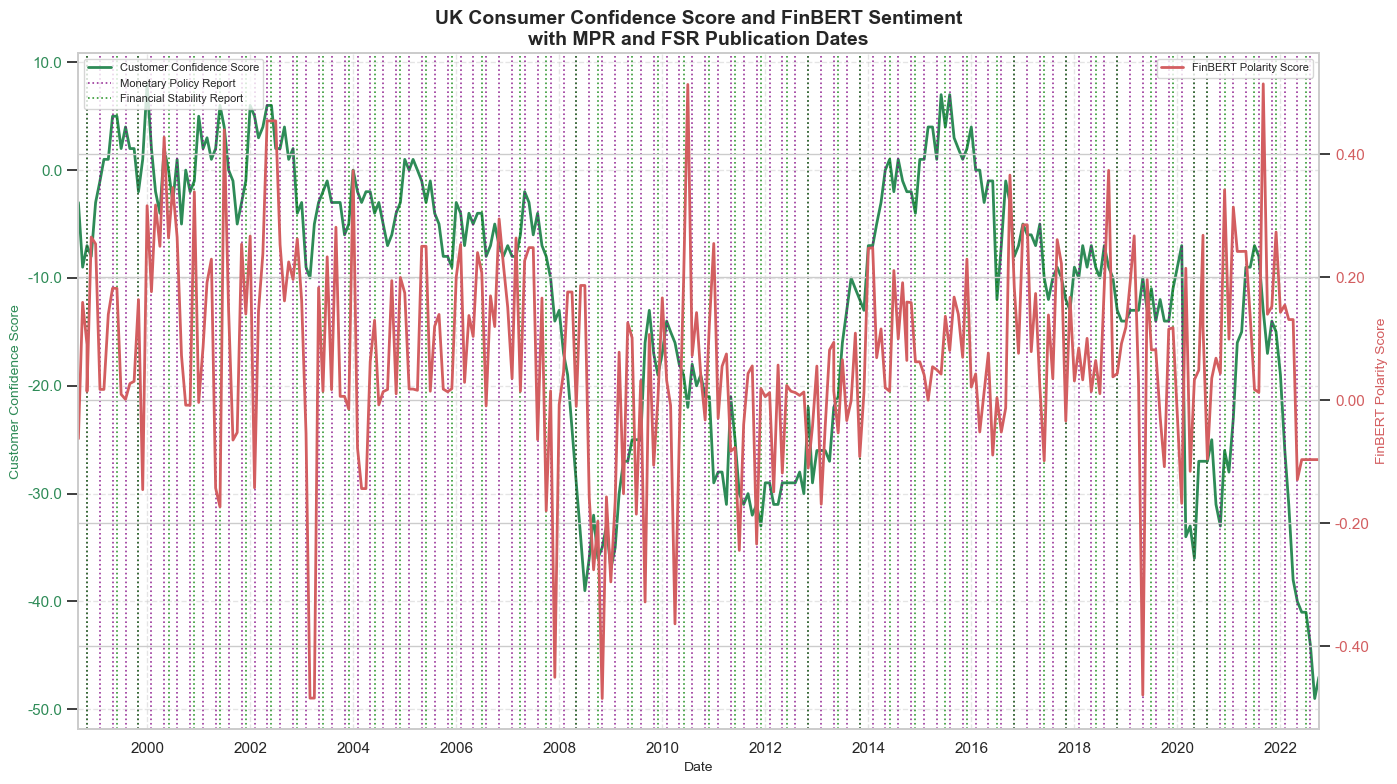

In [91]:
# Filter data from 1 Sep 1998 onwards
start_date = pd.to_datetime('1998-09-01')
df_plot2 = df_uk_full[df_uk_full['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Load publication dates from repo
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# Apply style
sns.set_style('whitegrid')

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 8))

# Confidence Score (Left Axis)
color_conf = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Customer Confidence Score', color=color_conf, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['confidence_score'], color=color_conf, label='Customer Confidence Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_conf, size=8)

# FinBERT Polarity Score (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Add MPR vertical lines (Purple)
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# Add FSR vertical lines (Green)
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# Title and layout
plt.title('UK Consumer Confidence Score and FinBERT Sentiment\nwith MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# Y-axis formatting
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Deduplicated legends
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# Grid and limits
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot2['Date'].max())
# Optional: remove y-axis limit so negative confidence values show
# ax1.set_ylim(bottom=-0.5)  # <-- comment or remove this line if needed

plt.show()

In [26]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_full.drop(['ftse_250_price',
                            'ftse_350_Price',
                            'ftse_350_Total Return (Gross, Unhedged)',
                            'price_02_Price',
                            'price_05_Price',
                            'price_05_Total Return (Gross, Unhedged)',
                            'price_10_Price',
                            'price_10_Total Return (Gross, Unhedged)',
                            'unemployment_rate'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'wage_growth_rate', 'gdp_GDP', 'polarity_score_finbert'],
      dtype='object')

In [28]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'wage_growth_rate',
       'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [30]:
# Define the new order of the columns
new_column_order = [
    'Date', 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
     'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,CPI_pct_change,finbert_sentiment_score,confidence_score,wage_growth_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
0,1989-12-01,NaN,NaN,NaN,NaN,0.5,803.789978,14.713333,NaN
1,1990-01-01,5.7,NaN,-19.0,NaN,0.5,783.250000,14.630000,NaN
2,1990-02-01,5.9,NaN,-24.0,NaN,0.5,746.010010,14.546667,NaN
3,1990-03-01,6.0,NaN,-35.0,NaN,0.7,741.700012,14.463333,NaN
4,1990-04-01,6.4,NaN,-31.0,NaN,0.7,701.510010,14.380000,NaN


### Corraletion Analysis

#### Create pairplot for visual correlation analysis

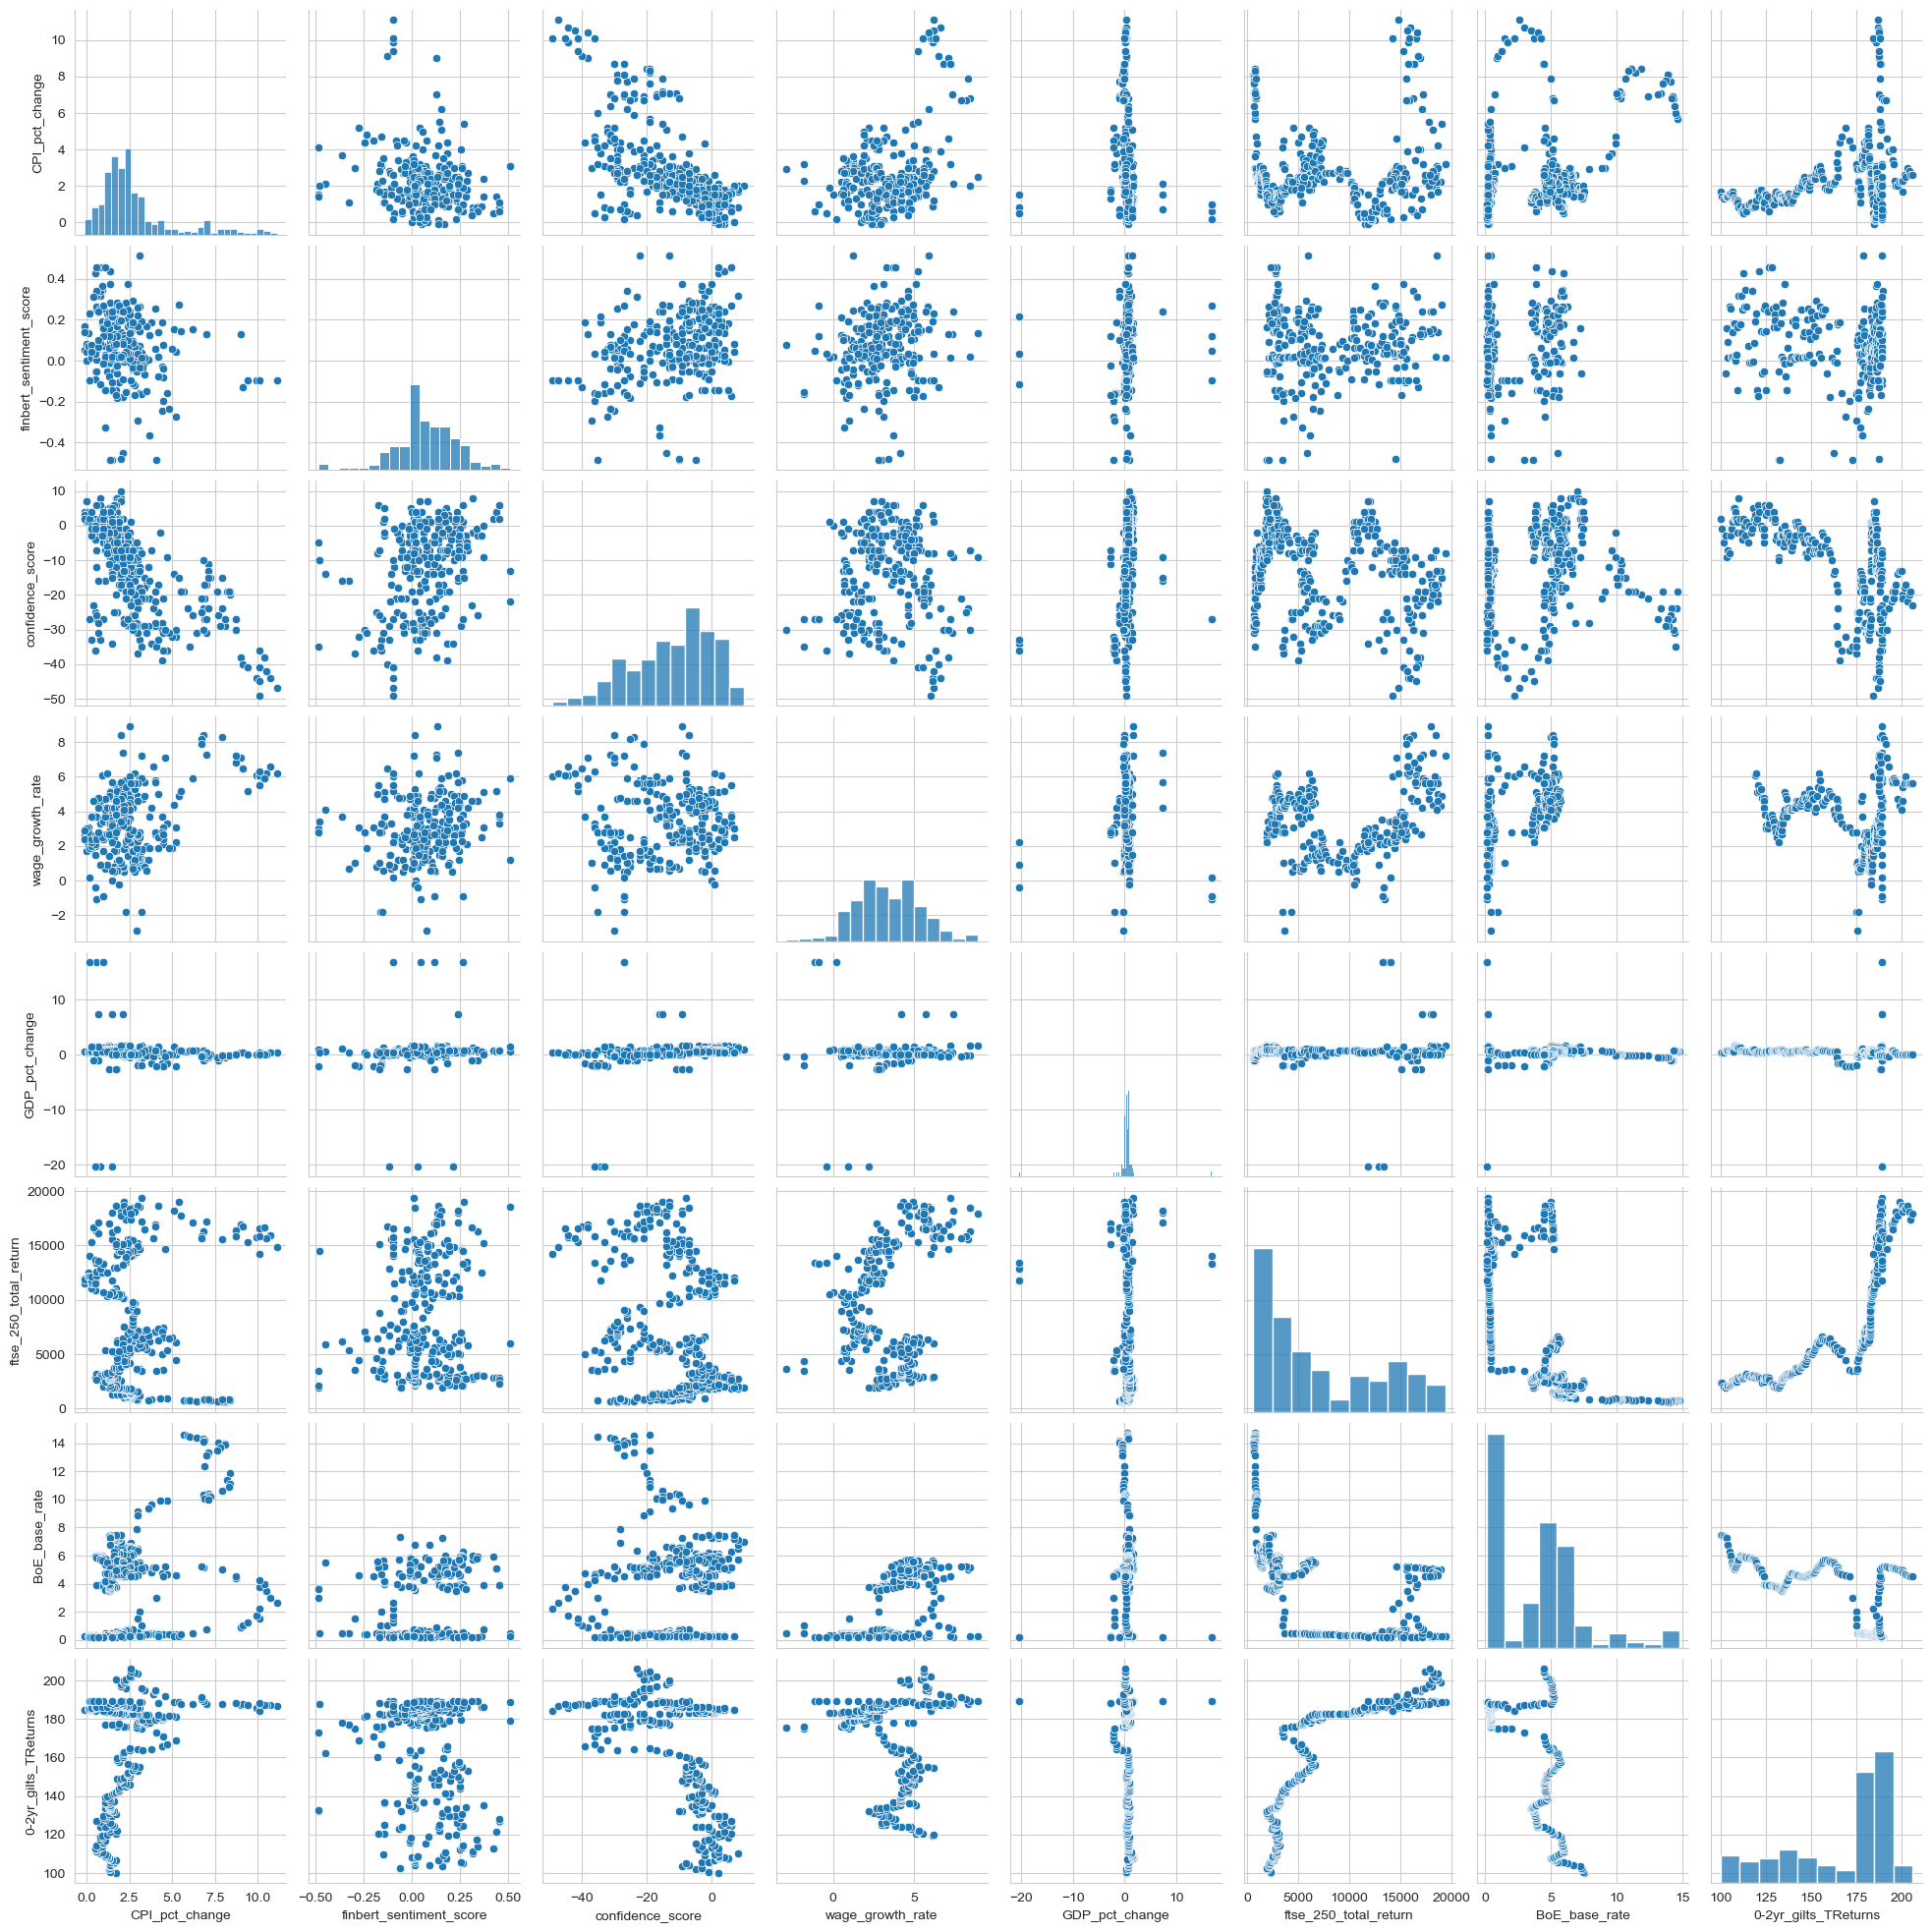

In [34]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

#### Create correlation matrices

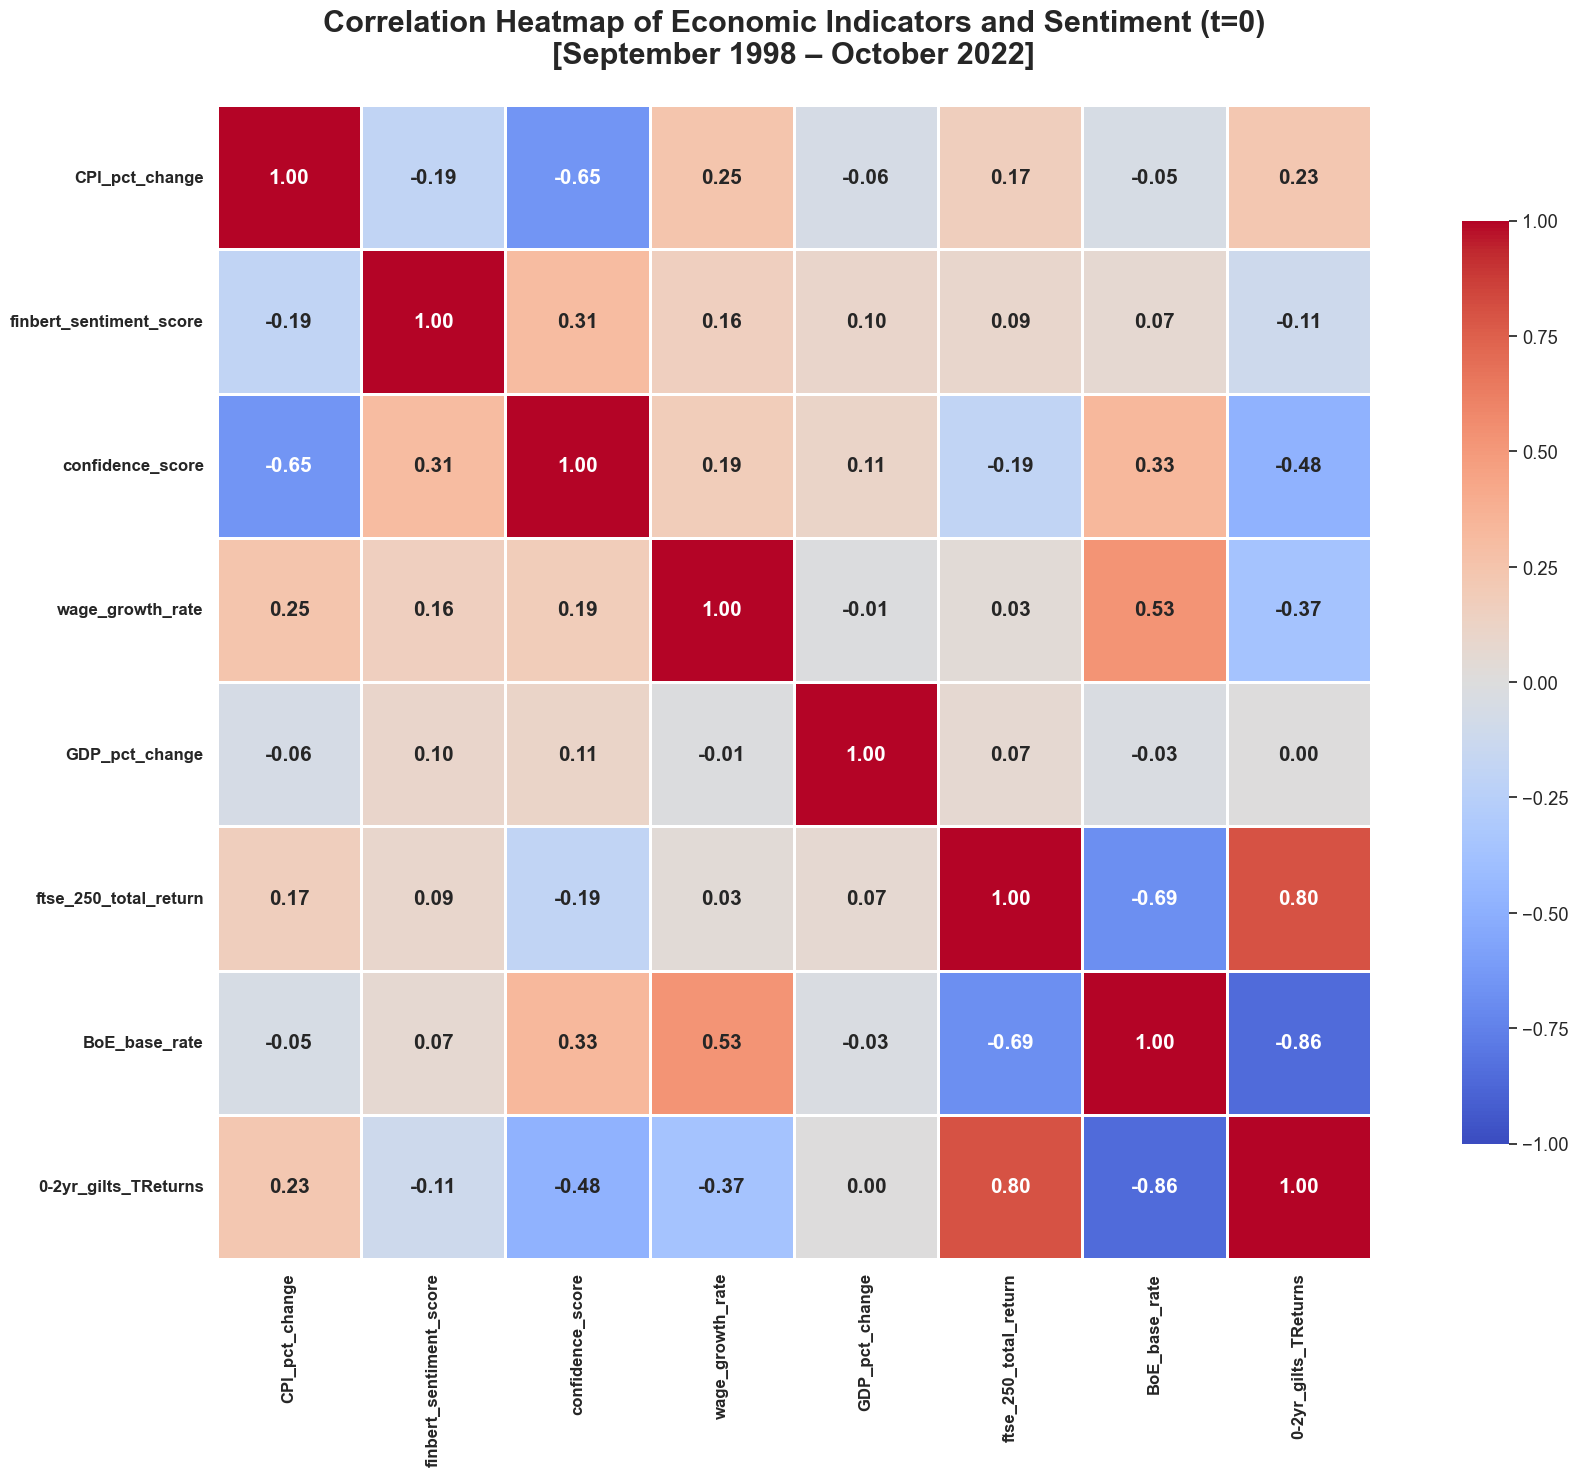

In [43]:
# --- Ensure date formatting ---
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], errors='coerce')

# --- Filter timeframe ---
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) & 
    (df_uk_focused['Date'] <= end_date)
].copy()

# --- Correlation on numeric columns only ---
numeric_data = filtered_df.select_dtypes(include='number').dropna()
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap of Economic Indicators and Sentiment (t=0)\n[September 1998 – October 2022]', 
          fontsize=22, fontweight='bold', pad=30)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

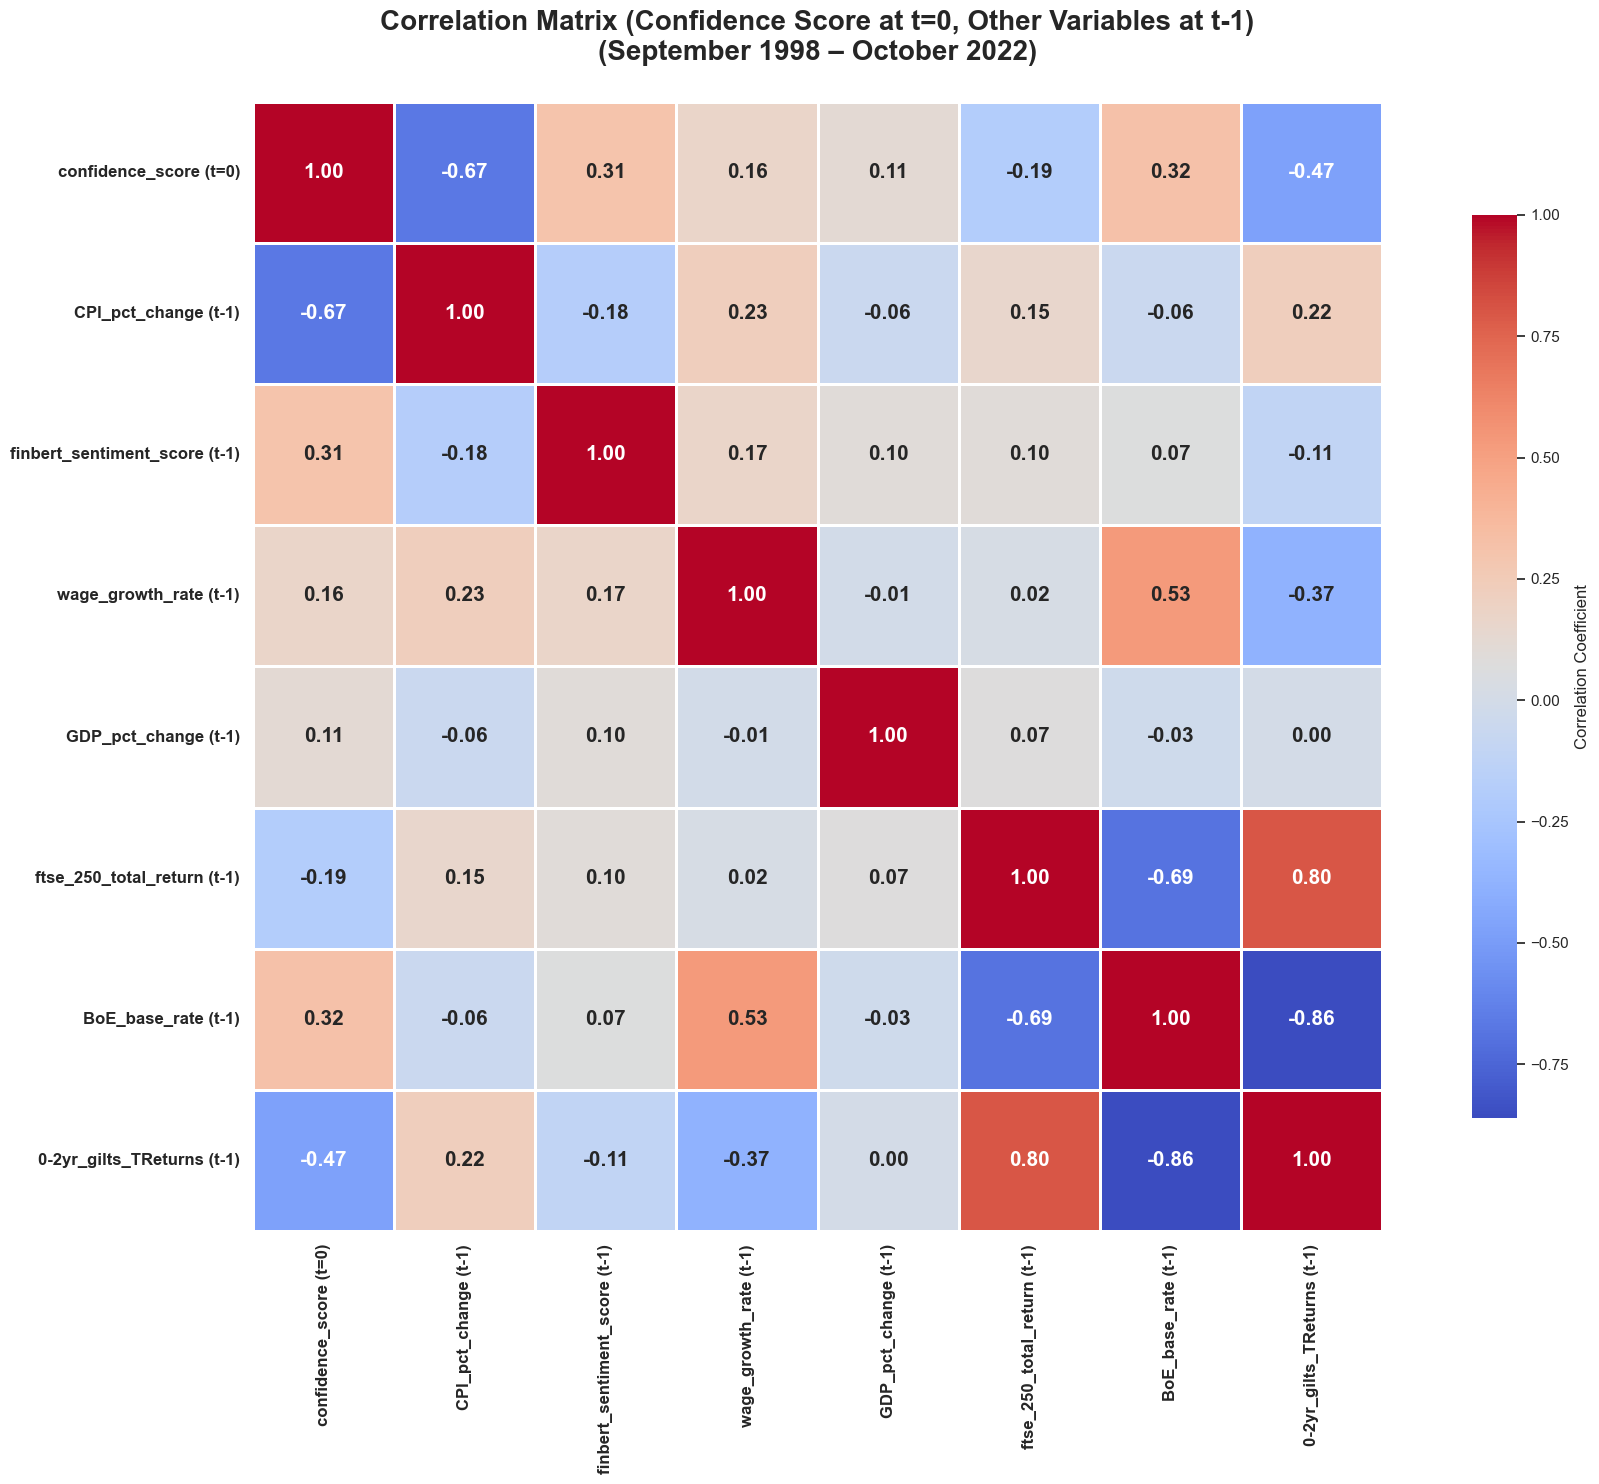

In [47]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

# Define date range
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns of interest
columns_of_interest = [
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=0)'}, inplace=True)

# Add all other variables with a 1-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t-1)"] = filtered_df[col].shift(1)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=0, Other Variables at t-1)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


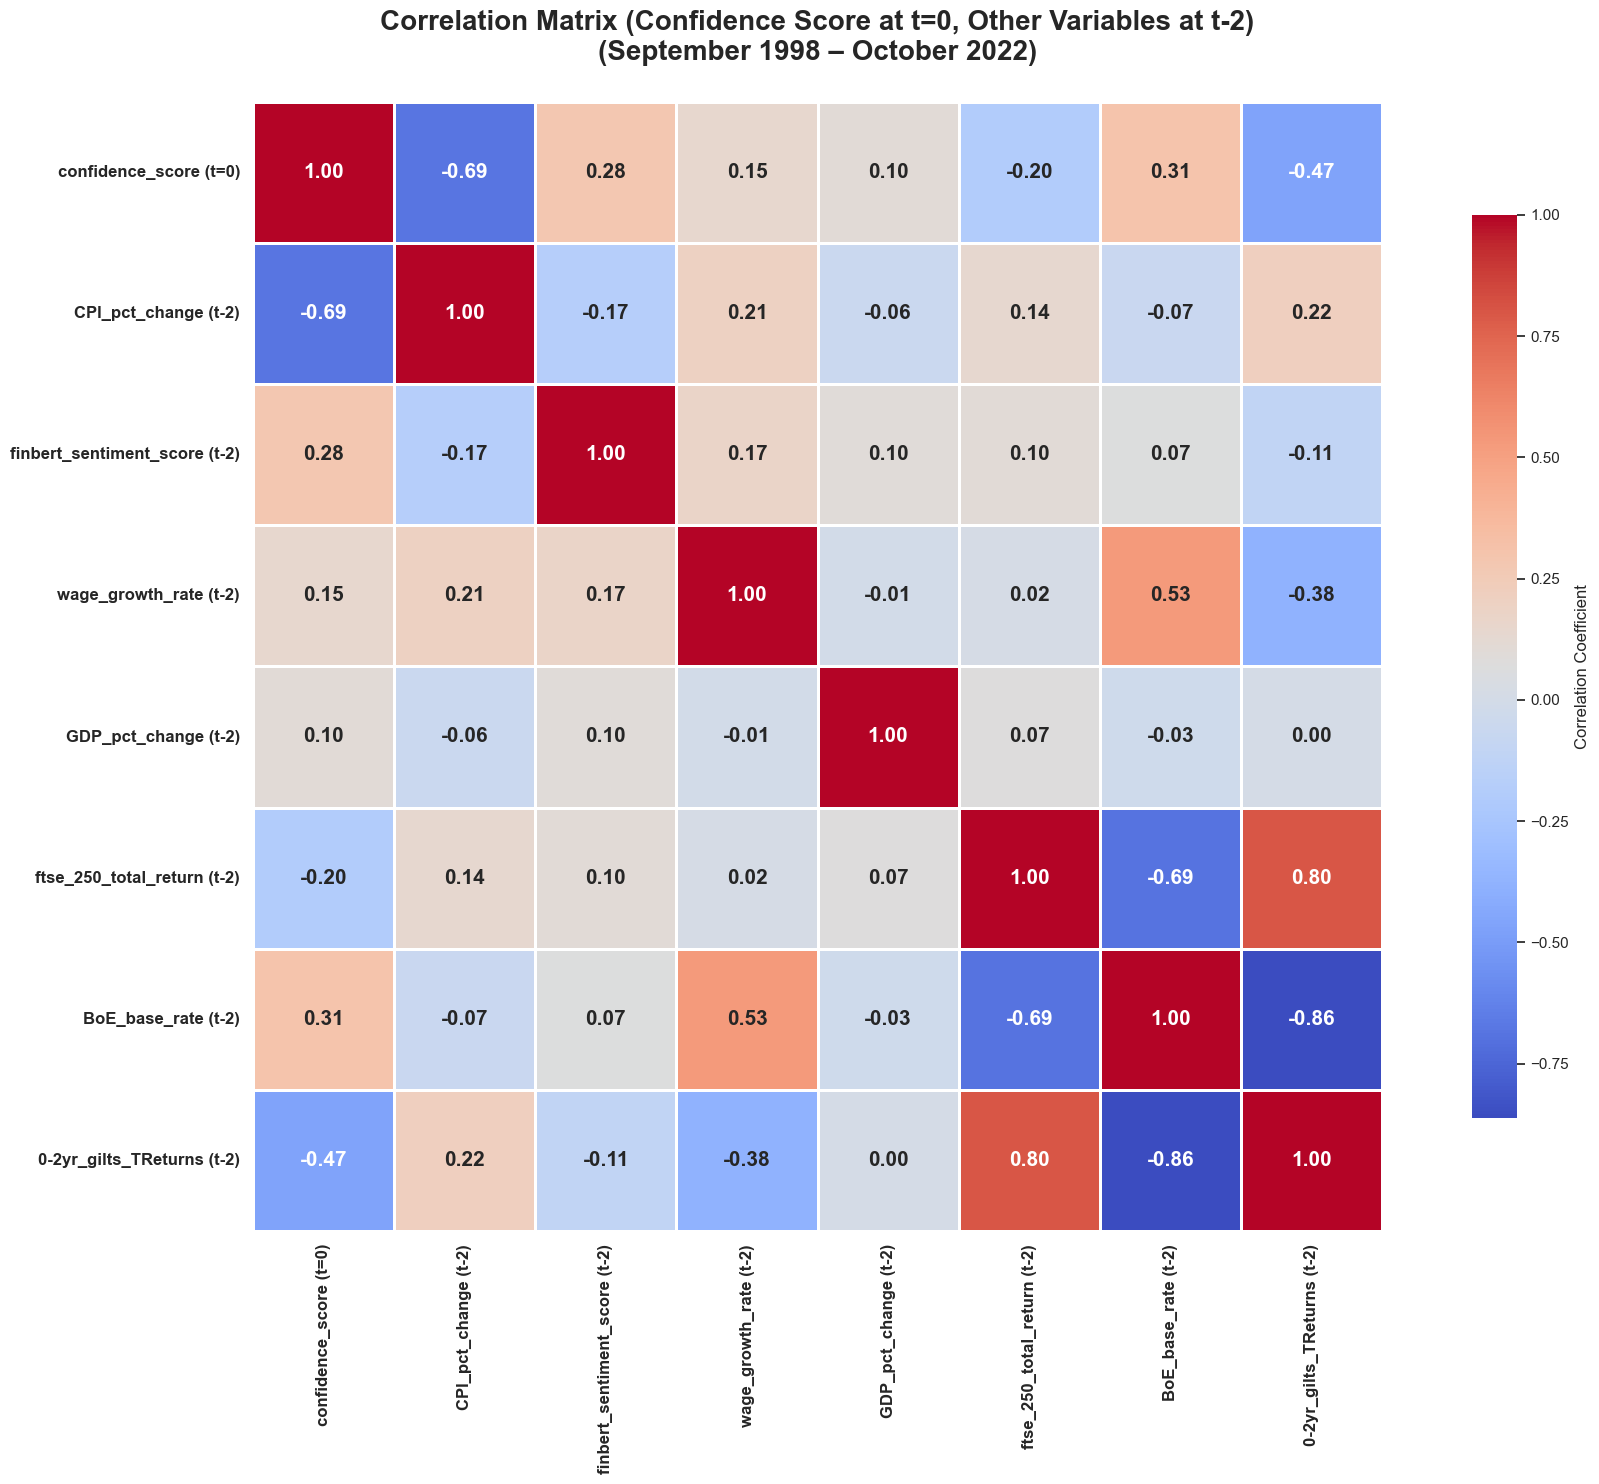

In [49]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

# Define date range
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) &
    (df_uk_focused['Date'] <= end_date)
].copy()

# Define columns of interest (excluding confidence_score)
columns_of_interest = [
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=0)'}, inplace=True)

# Add all other variables with a 2-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t-2)"] = filtered_df[col].shift(2)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=0, Other Variables at t-2)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

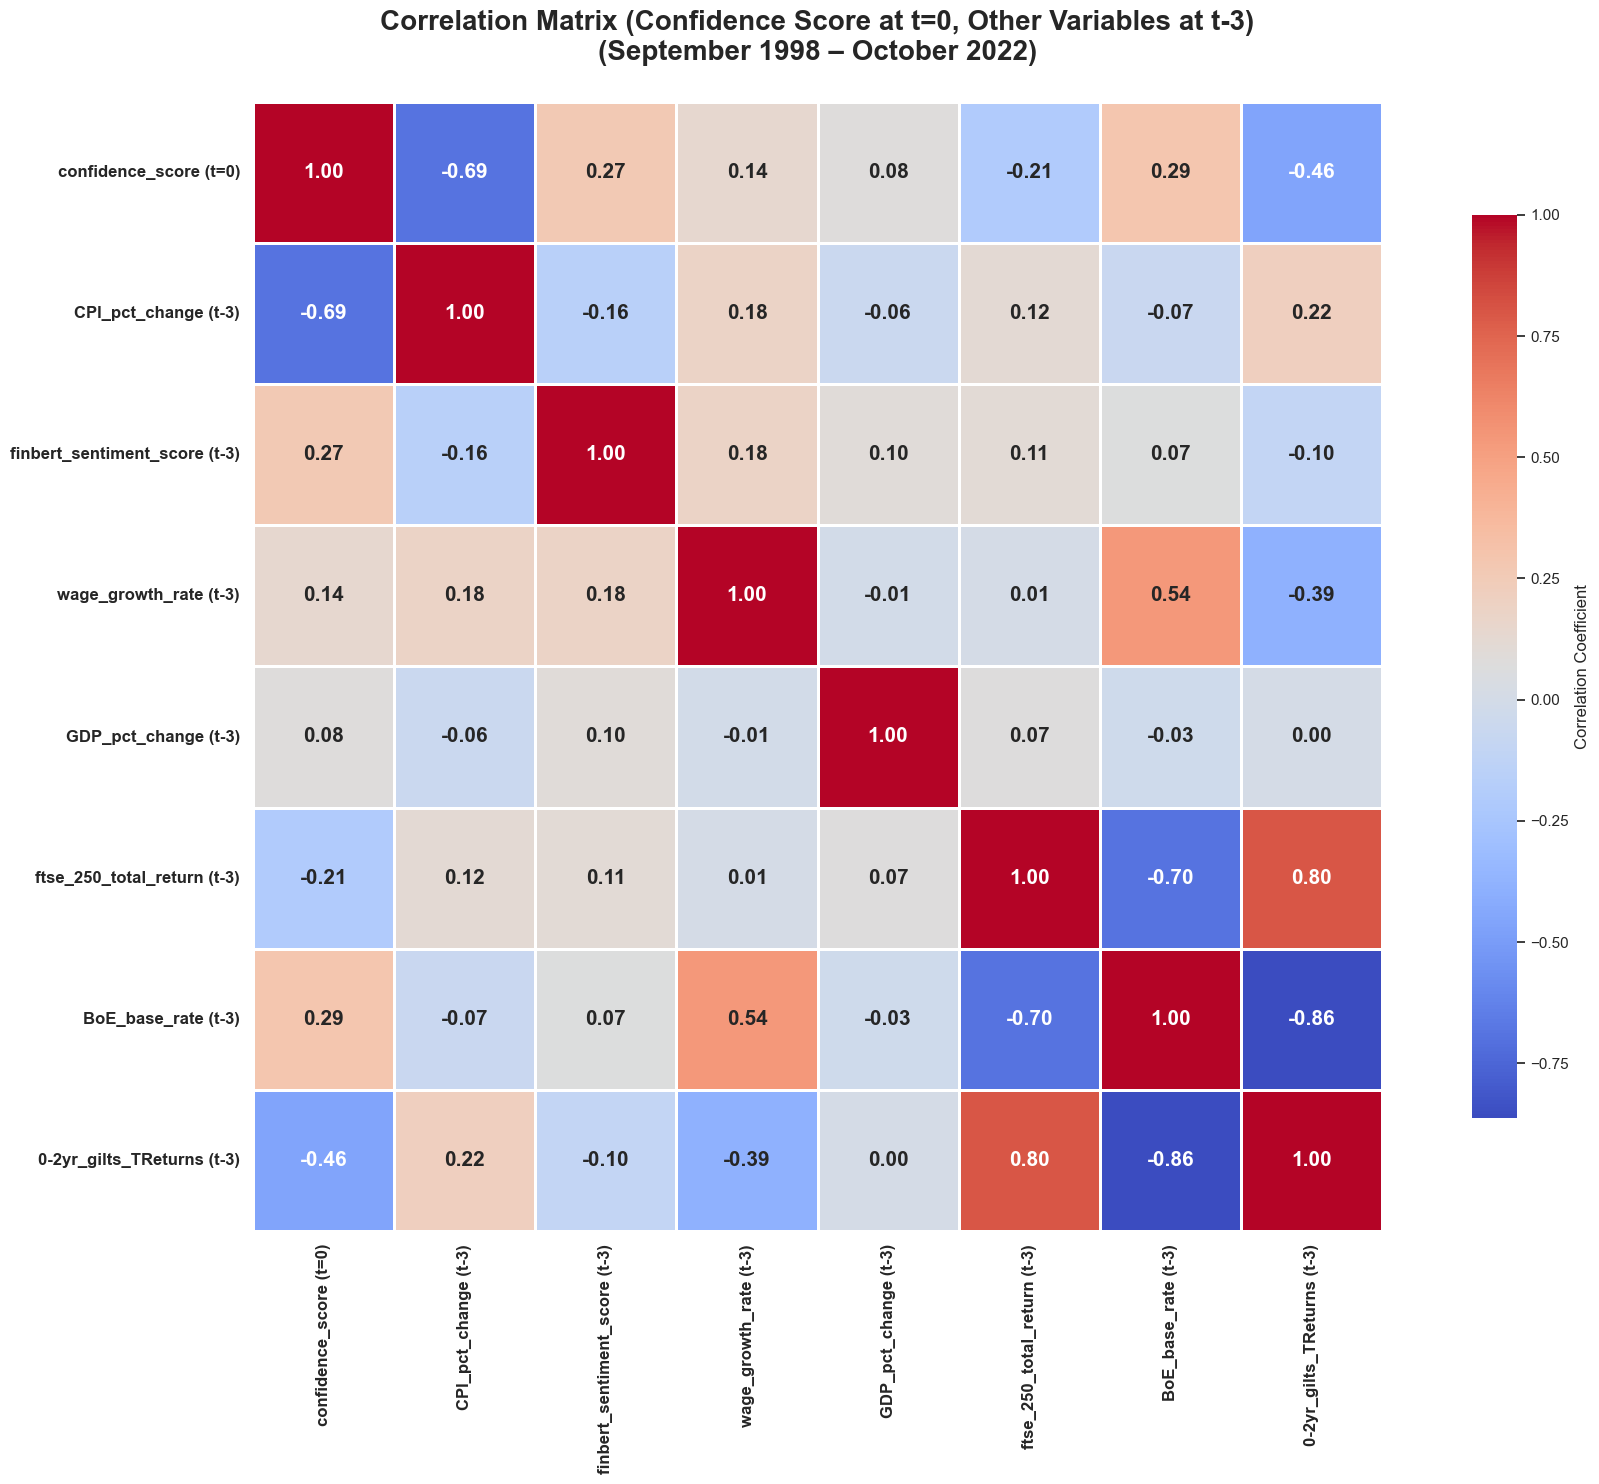

In [51]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

# Define date range
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) &
    (df_uk_focused['Date'] <= end_date)
].copy()

# Define columns of interest (excluding confidence_score)
columns_of_interest = [
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=0)'}, inplace=True)

# Add all other variables with a 3-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t-3)"] = filtered_df[col].shift(3)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=0, Other Variables at t-3)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


#### The analysis of the correlation heatmaps suggests that t-1 appears to offer the best overall correlation, particularly for Confidence Score and the BoE Base Rate, where the relationships with FinBERT sentiment score are strongest. While most indicators align best with a one-month lag, GDP_pct_change shows a slightly better correlation at t-2, indicating a modestly delayed relationship. Meanwhile, Wage Growth Rate exhibits a marginally stronger correlation at t-3, suggesting a longer response time to sentiment shifts.

In [54]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) &
    (df_uk_focused['Date'] <= end_date)
].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']

# Add required variables with specific time lags
regression_df['confidence_score (t=0)'] = filtered_df['confidence_score']
regression_df['confidence_score (t-1)'] = filtered_df['confidence_score'].shift(1)
regression_df['BoE_base_rate (t-1)'] = filtered_df['BoE_base_rate'].shift(1)
regression_df['GDP_pct_change (t-2)'] = filtered_df['GDP_pct_change'].shift(2)
regression_df['wage_growth_rate (t-3)'] = filtered_df['wage_growth_rate'].shift(3)

# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation matrix
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)


,confidence_score (t=0),confidence_score (t-1),BoE_base_rate (t-1),GDP_pct_change (t-2),wage_growth_rate (t-3)
confidence_score (t=0),1.000000,0.959263,0.306723,0.102229,0.135960
confidence_score (t-1),0.959263,1.000000,0.327417,0.114716,0.169026
BoE_base_rate (t-1),0.306723,0.327417,1.000000,-0.019371,0.553770
GDP_pct_change (t-2),0.102229,0.114716,-0.019371,1.000000,-0.083311
wage_growth_rate (t-3),0.135960,0.169026,0.553770,-0.083311,1.000000


In [70]:
# Define dependent variable
y = regression_df['confidence_score (t=0)']

# Define independent variables
X = regression_df[
    ['confidence_score (t-1)', 
     'BoE_base_rate (t-1)', 'GDP_pct_change (t-2)', 
     'wage_growth_rate (t-3)']
]

# Initialize and fit the model
mlr = LinearRegression()
mlr.fit(X, y)

# Print coefficients
coefficients = pd.Series(mlr.coef_, index=X.columns)
intercept = mlr.intercept_

print("Intercept:", intercept)
print("Coefficients:")
print(coefficients)

Intercept: 0.10400021109687962
Coefficients:
confidence_score (t-1)    0.974674
BoE_base_rate (t-1)       0.058771
GDP_pct_change (t-2)     -0.042193
wage_growth_rate (t-3)   -0.231461
dtype: float64


In [72]:
LinearRegression()

LinearRegression()

In [74]:
# Call the predictions for X (array).
mlr.predict(X)

array([  0.93311033,   4.80376353,   3.09990476,  -0.89627388,
        -1.8162027 ,  -5.74429972,  -3.70860657,  -1.76023767,
         5.10779439,   4.22472487,   2.36698113,   3.47111348,
         5.46577449,   5.46479497,   1.48724181,   1.39367809,
         3.31890094,   0.43597157,   1.45595836,  -4.32362827,
        -3.3225682 ,  -9.12530088, -10.03347549,  -5.10204349,
        -3.29450992,  -2.36906637,  -1.46676886,  -3.27356779,
        -3.2698946 ,  -3.30829418,  -6.32122783,  -5.43424023,
        -0.58538639,  -2.57612933,  -3.77736646,  -2.75994121,
        -2.70875152,  -4.41194666,  -3.51407162,  -5.47921971,
        -7.40664648,  -6.43741599,  -4.48929197,  -3.5389882 ,
         0.3500456 ,  -0.64899906,   0.3475968 ,  -0.72510534,
        -1.67785789,  -3.65157676,  -1.63401459,  -4.60555372,
        -5.60214958,  -8.57545925,  -8.62052695,  -9.54768466,
        -3.65839165,  -4.58554936,  -7.43890945,  -4.55573519,
        -5.64491526,  -4.76160086,  -4.68671898,  -8.56

In [76]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.921063778663839
Intercept:  0.10400021109687962
Coefficients:


[('confidence_score (t-1)', 0.9746742111225691),
 ('BoE_base_rate (t-1)', 0.05877106870859005),
 ('GDP_pct_change (t-2)', -0.04219324063542939),
 ('wage_growth_rate (t-3)', -0.23146051150301247)]

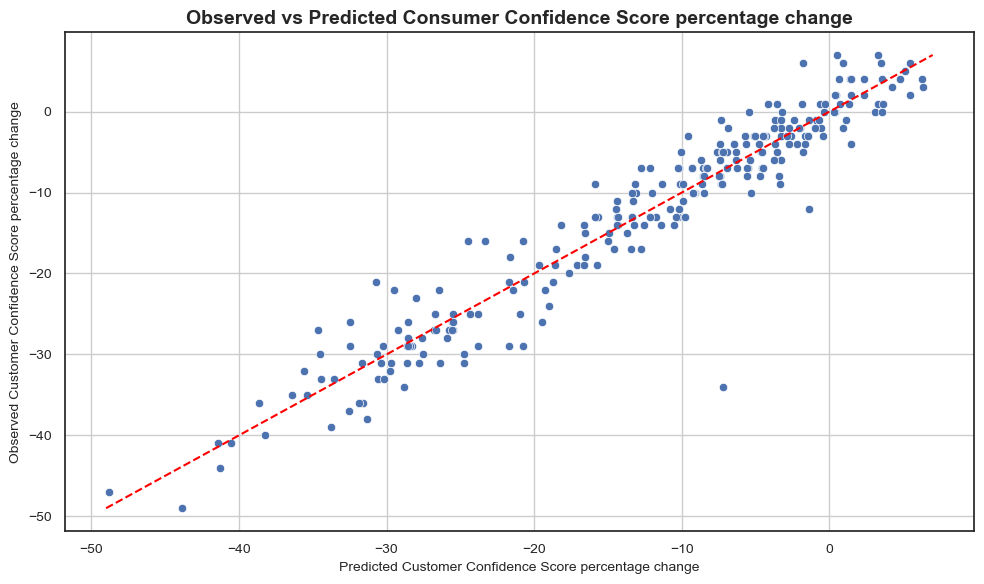

In [89]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['confidence_score (t=0)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Customer Confidence Score percentage change', fontsize=10)
plt.ylabel('Observed Customer Confidence Score percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Consumer Confidence Score percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

#### This scatter plot illustrates the relationship between observed and predicted values for Consumer Confidence Score percentage change. The tight clustering of data points along the red dashed line (which represents the line of perfect prediction) indicates a strong linear relationship and suggests that the model performs well in capturing the variation in customer confidence. Most predictions are closely aligned with actual observations, and the consistency in this pattern reflects low bias and good predictive accuracy. A few outliers are visible, but they do not significantly deviate from the general trend, implying the model is robust and generalizes well across the dataset. Overall, the model provides a reliable fit for explaining changes in customer confidence based on the selected predictors.

### Training and testing subsets with MLR

In [84]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [86]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                              OLS Regression Results                              
Dep. Variable:     confidence_score (t=0)   R-squared:                       0.917
Model:                                OLS   Adj. R-squared:                  0.915
Method:                     Least Squares   F-statistic:                     558.6
Date:                    Thu, 15 May 2025   Prob (F-statistic):          2.60e-108
Time:                            22:30:43   Log-Likelihood:                -561.11
No. Observations:                     208   AIC:                             1132.
Df Residuals:                         203   BIC:                             1149.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

#### The regression model explains 91.7% of the variance in the current Customer Confidence Score, indicating an excellent fit. The lagged confidence score (t-1) is highly significant and the primary driver of current confidence levels, while other predictors—BoE base rate (t-1), GDP change (t-2), and wage growth rate (t-3)—are not statistically significant. The Durbin-Watson statistic (~2.05) suggests little to no autocorrelation in residuals. However, the Jarque-Bera and Omnibus tests indicate that the residuals are not normally distributed, so further diagnostic checks are recommended. The condition number (45.5) shows no immediate concern, but a check for multicollinearity using VIFs is advisable.

In [96]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [100]:
LinearRegression()

LinearRegression()

In [102]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [ -5.63066923 -15.00251386   3.34204527  -9.55751807 -31.93499871
  -3.68787161  -9.43341565 -14.37108953  -1.5150319   -3.46869005
  -7.3404307  -25.76490295  -8.27632754 -31.72954724 -10.24833245
 -20.90941882 -19.54800408 -17.81799918  -4.26106829  -1.60896253
 -21.20551936 -27.76140903   3.47663086 -30.82382568 -18.97735389
 -25.68494633  -8.5189483    3.15649448 -31.6223269  -28.79886947
 -32.69924286  -1.54213431 -38.69567087 -16.03446014   3.12126947
  -3.28447872 -10.32195793   1.17950952  -5.46229157 -13.27503502
  -5.75419723  -3.63785178 -29.70389117  -1.93536867 -20.95596214
  -5.55566231 -26.63405494 -33.83114459 -14.6390258  -13.59078817
  -5.43644103   5.53168856  -2.77235195  -3.24453085  -4.44493328
 -30.01818999 -18.89115659 -27.81956987 -10.01365646 -28.43010373
 -34.69680722   3.41365589 -28.03402556  -4.59273721 -19.82724013
  -2.30535685 -25.8077449  -10.71026883  -7.38415232  -7.40826085
  -6.39780285  -9.33826091 -25.35403693 -10.5078613

In [104]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [ -6.31708578  -3.44330329 -14.63538809  -7.50385203 -10.44617423
 -44.17564021   6.21458104 -25.65851922   4.2509727    1.33942276
  -3.27430066 -14.498021    -8.4394184   -7.4690034   -5.58950206
  -7.44162971 -16.28283649  -3.72510088 -11.62683815 -16.77586143
 -20.85555167 -30.92852117  -4.30417573 -13.35479079  -0.47066459
   0.39458161  -4.41566053  -0.60736582  -7.08976247   1.4154396
 -30.39268339 -33.80256921 -21.61213433  -2.56612969 -12.19503408
 -12.85445176 -13.43640213   2.40065455 -18.84631072 -25.51367024
 -36.59207978 -10.93956097  -2.3561534    0.83137215   1.48365476
 -32.6955697  -28.72687957  -7.36142078 -23.8530464    0.4903783
 -34.5306276   -9.45387197]


In [106]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

93.71742042988424


#### The model achieves an R-squared of 93.7% when applied to the testing dataset, indicating a very strong predictive performance—93.7% of the variance in the target variable is explained by the model. This suggests that the regression generalizes well beyond the training data. However, despite the high explanatory power, concerns such as multicollinearity (indicated by high correlation among predictors) and heteroskedasticity (non-constant variance in residuals) still persist.

### Check for multicollinearity

In [110]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                features
0         6.3                   const
1         1.1  confidence_score (t-1)
2         1.5     BoE_base_rate (t-1)
3         1.0    GDP_pct_change (t-2)
4         1.4  wage_growth_rate (t-3)


#### The VIF results show that all predictors have values well below the common threshold of 10, indicating no serious multicollinearity in the model. The constant term (6.3) is higher but not a concern. Overall, the independent variables are not highly correlated with each other, so multicollinearity is not an issue in this regression.

### Check for heteroscedasticity

In [115]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [117]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 3.4848661651542816, 'LM Test p-value': 0.48018320545870363, 'F-stat': 0.8647622039765465, 'F-test p-value': 0.4860227488531199}


#### The Breusch-Pagan test results indicate that there is no significant evidence of heteroskedasticity in the model. Both the LM test p-value (0.48) and the F-test p-value (0.49) are well above the 0.05 threshold, meaning we fail to reject the null hypothesis of constant variance in the residuals. In simple terms, the model's error terms appear to have a consistent spread, which supports the reliability of standard errors and overall model stability.

### Evaluate the model

In [121]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 2.3197437524196474
Mean Square Error (Final): 9.22693464941808


#### The model's Mean Absolute Error (MAE) of 2.32 indicates that, on average, predictions deviate from actual values by about 2.32 units. The Mean Squared Error (MSE) of 9.23 reflects the average squared difference between predicted and actual values, with larger errors having a greater impact. Both values suggest the model performs well, especially given the high R², though the MSE highlights the presence of a few larger errors. Overall, the model shows strong predictive accuracy with relatively low error.

### Check normality of regression residuals

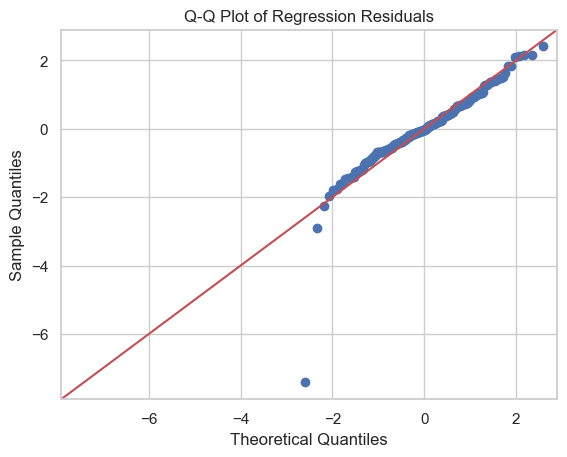

In [125]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

#### The Q-Q plot of regression residuals shows that most of the residuals lie close to the 45-degree reference line, indicating that the residuals are approximately normally distributed. However, there are a few noticeable deviations in the lower and upper tails, suggesting the presence of mild skewness or heavy tails.

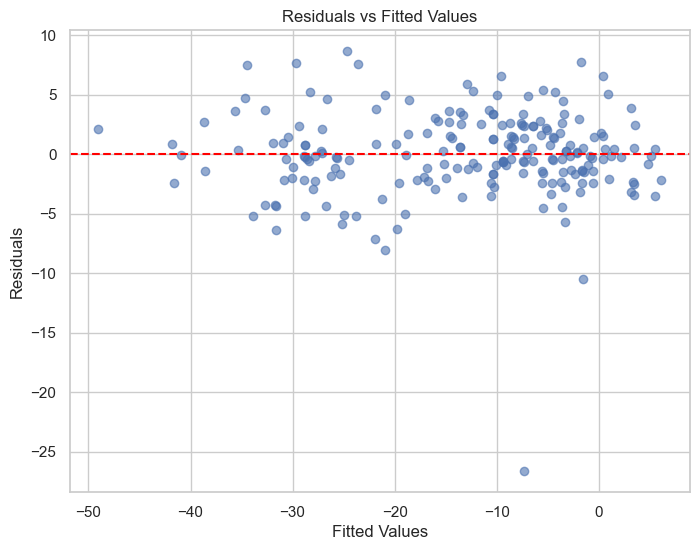

In [129]:
# Fitted values from statsmodels
fitted_vals = model1.fittedvalues
residuals = model1.resid

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

#### This residuals vs. fitted values plot shows that the residuals are generally centered around zero, which supports the assumption of unbiased errors. However, there is some visible spread and mild asymmetry, especially for lower fitted values (e.g., below -30), where residuals appear more dispersed. There are no strong patterns like funnels or curves, suggesting no major heteroskedasticity or non-linearity. Overall, the residuals appear reasonably well-behaved

### Random Forest vs. XGBoost Models

In [136]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/150.0 MB 13.4 MB/s eta 0:00:12
   ---------------------------------------- 1.7/150.0 MB 21.3 MB/s eta 0:00:07
   - -------------------------------------- 4.0/150.0 MB 31.6 MB/s eta 0:00:05
   - -------------------------------------- 6.3/150.0 MB 36.3 MB/s eta 0:00:04
   -- ------------------------------------- 8.2/150.0 MB 37.4 MB/s eta 0:00:04
   -- ------------------------------------- 9.6/150.0 MB 36.2 MB/s eta 0:00:04
   --- ------------------------------------ 12.0/150.0 MB 46.7 MB/s eta 0:00:03
   --- ------------------------------------ 13.9/150.0 MB 43.5 MB/s eta 0:00:04
   ---- ----------------------------------- 16.0/150.0 MB 43.5 MB/s eta 0:00:04
   ---- ----------------------------------- 18.4/150.0 MB 43.7 MB/s eta 0:00:04
   ----- ---------------------------------- 20.0/150.0 MB 46.9 MB/s eta 0:00:03
   ----- ---------------------------------- 22.0/150.0 


--- Random Forest ---
R² Score: 0.9295
MAE: 2.4248
MSE: 10.3469

--- XGBoost ---
R² Score: 0.9251
MAE: 2.5616
MSE: 10.9970


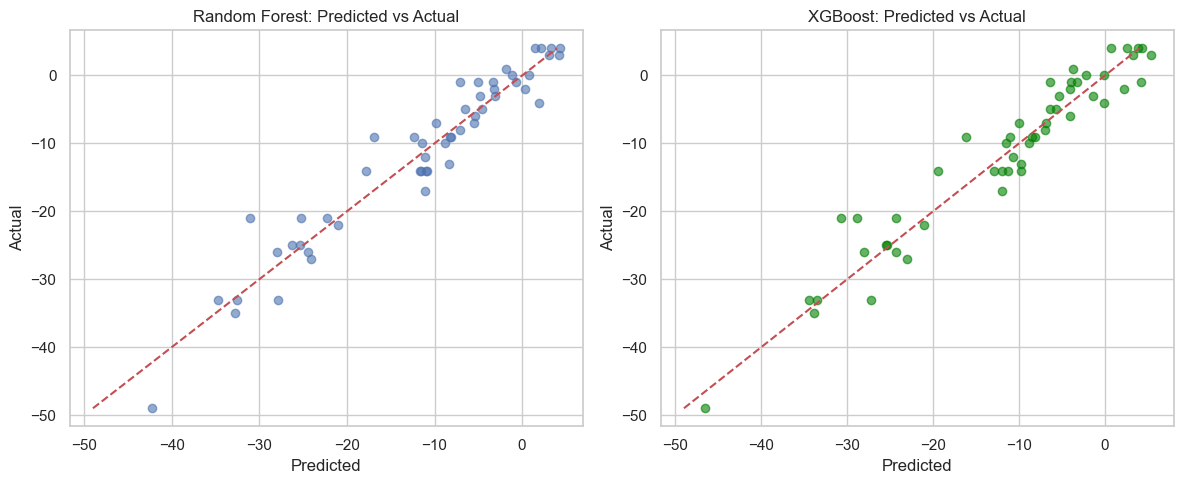

In [143]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Drop rows with NA from lags ---
regression_df = regression_df.dropna()

# Define features and target ---
X = regression_df[['confidence_score (t-1)', 'BoE_base_rate (t-1)', 'GDP_pct_change (t-2)', 'wage_growth_rate (t-3)']]
y = regression_df['confidence_score (t=0)']

# Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Random Forest ---
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

#Train XGBoost ---
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluation function ---
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")

# Evaluate both
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)

# --- Step 7: Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# RF plot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")

# XGB plot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")

plt.tight_layout()
plt.show()

#### Both Random Forest and XGBoost models exhibit strong performance in predicting the Customer Confidence Score, with Random Forest slightly outperforming XGBoost across all evaluation metrics. The Random Forest model achieved an R² score of 0.9295, a mean absolute error (MAE) of 2.42, and a mean squared error (MSE) of 10.35. In comparison, XGBoost produced an R² score of 0.9251, MAE of 2.56, and MSE of 10.99. The prediction plots further support this, as Random Forest's predicted values align more closely with the actual values, showing fewer outliers and tighter clustering along the ideal reference line. While both models are reliable and capture the underlying patterns well, Random Forest demonstrates slightly greater accuracy and consistency on this dataset.